<a href="https://colab.research.google.com/github/hayannn/AIFFEL_STUDY/blob/main/Langchain%EC%9C%BC%EB%A1%9C_ChatGPT_API_%ED%99%9C%EC%9A%A9%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 강의
https://www.youtube.com/watch?v=BLM3KDaOTJM&list=PLQIgLu3Wf-q_Ne8vv-ZXuJ4mztHJaQb_v&index=3

## 필수 라이브러리 설치

In [ ]:
!pip install -q langchain openai langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.3/454.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.5 MB/s eta 0:00:00


## API KEY 설정

In [ ]:
#API KEY 저장을 위한 os 라이브러리 호출
import os

#OPENAI API키 저장
#API KEY 발급 페이지: https://platform.openai.com/docs/guides/gpt/completions-api
os.environ["OPENAI_API_KEY"] = '{발급받은 API 키}'

## 1. API를 통해 GPT-3, ChatGPT와 대화해보기

**langchain_openai의 OpenAI() 기본 모델은 'gpt-3.5-turbo-instruct'.**
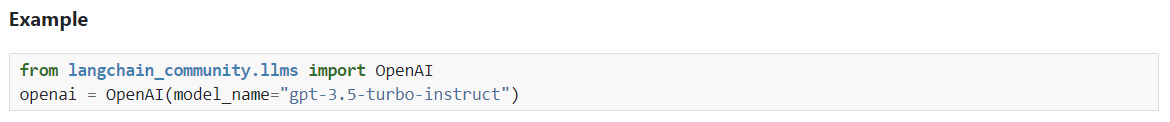
**해당 모델은 Completion endpoint를 사용할 수 있으나, 이후 모델은 ChatCompletion을 활용해야함**
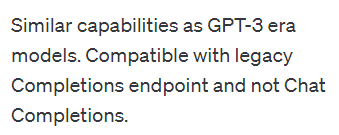

- https://platform.openai.com/docs/guides/text-generation
![](https://velog.velcdn.com/images/dlgkdis801/post/043e2e27-c6ad-428f-81a4-db16d0d7f09c/image.png)

 - [text-davinci-003은 2024년 1월 4일부터 shutdown 될 예정](https://platform.openai.com/docs/deprecations)
  - 이미 사용이 불가한 상태

In [ ]:
from langchain_openai import OpenAI

davinch3 = ChatOpenAI(model_name="text-davinci-003")
response = davinch3.predict("Why is Python the most popular programming language? Answer in Korean.")
print(response)

NotFoundError: Error code: 404 - {'error': {'message': 'The model `text-davinci-003` has been deprecated, learn more here: https://platform.openai.com/docs/deprecations', 'type': 'invalid_request_error', 'param': None, 'code': 'model_not_found'}}

<br>

- gpt-3.5-turbo 사용

In [ ]:
from langchain_openai import ChatOpenAI

davinch3 = ChatOpenAI(model_name="gpt-3.5-turbo")
response = davinch3.predict("Why is Python the most popular programming language? Answer in Korean.")
print(response)

파이썬이 가장 인기 있는 프로그래밍 언어인 이유는 다양한 이유가 있습니다. 첫째, 파이썬은 배우기 쉽고 읽기 쉬운 문법을 가지고 있어 초보자들도 쉽게 프로그래밍을 시작할 수 있습니다. 둘째, 파이썬은 다양한 분야에서 사용되는 범용 프로그래밍 언어로서 데이터 분석, 인공지능, 웹 개발 등 다양한 분야에서 활용될 수 있습니다. 또한, 파이썬은 커뮤니티가 활발하고 다양한 라이브러리와 프레임워크를 제공하여 개발자들이 효율적으로 프로그램을 작성할 수 있도록 도와줍니다. 이러한 이유들로 파이썬은 가장 인기 있는 프로그래밍 언어 중 하나로 자리 잡았습니다.


<br>

In [25]:
from langchain_openai import OpenAI
llm = OpenAI()
result = llm.invoke('왜 파이썬이 가장 인기있는 프로그래밍 언어야?')
print(result)



1. 간결하고 쉬운 문법: 파이썬은 간결하고 직관적인 문법을 가지고 있어 학습하기 쉽고 읽기 쉽습니다. 이는 프로그래밍을 처음 배우는 사람들에게 매우 유용하며, 빠르게 개발할 수 있도록 도와줍니다.

2. 다양한 분야에서 활용 가능: 파이썬은 데이터 분석, 인공지능, 웹 개발, 과학 및 공학 분야 등 다양한 분야에서 활용이 가능합니다. 또한, 간결한 문법과 다양한 라이브러리를 제공하기 때문에 빠른 개발이 가능합니다.

3. 무료 오픈소스: 파이썬은 무료로 이용할 수 있는 오픈소스 프로그래밍


<br>

#### 매개변수 max_tokens 조절

In [26]:
from langchain_openai import OpenAI
llm = OpenAI()
llm = OpenAI(model_name = 'gpt-3.5-turbo-instruct', max_tokens = -1)
result = llm.invoke('왜 파이썬이 가장 인기있는 프로그래밍 언어야?')
print(result)



1. 쉽고 간결한 문법: 파이썬은 문법이 간결하고 읽기 쉬워서 쉽게 배울 수 있습니다. 또한 들여쓰기를 강제함으로써 코드의 가독성을 높여줍니다.

2. 다양한 용도로 사용 가능: 파이썬은 데이터 분석, 인공지능, 웹 개발, 게임 개발 등 다양한 분야에서 사용될 수 있기 때문에 범용적으로 사용할 수 있습니다.

3. 대중적인 인기: 파이썬은 대중적으로 인기 있는 언어이기 때문에 다양한 개발자들이 사용하고 있습니다. 따라서 온라인에서도 다양한 커뮤니티와 자료를 찾아볼 수 있어서 학습에 용이합니다.

4. 오픈 소스: 파이썬은 오픈 소스 언어이기 때문에 무료로 사용할 수 있습니다. 또한 개발자들 사이에서 지속적으로 발전하고 있기 때문에 항상 최신 기술을 적용할 수 있습니다.

5. 다양한 라이브러리와 프레임워크: 파이썬은 다양한 라이브러리와 프레임워크가 존재하기 때문에 개발 속도가 빠르고 효율적으로 작업할 수 있습니다.

6. 크로스 플랫폼 지원: 파이썬은 윈도우, 맥, 리눅스 등 다양한 운영체제에서 동일한 코드를 실행할 수 있어서 플랫폼에 구애받지 않고 개발할 수 있습니다.

7. 배우기 쉬운 언어: 파이썬은 객체 지향 언어이지만 다른 언어들에 비해 배우기 쉬운 언어입니다. 따라서 프로그래밍 입문자들에게도 적합한 언어입니다.

8. 빠른 개발 속도: 파이썬은 컴파일 언어가 아니기 때문에 코드를 작성하고 실행하는 시간이 짧습니다. 또한 간결한 문법으로 인해 개발 속도가 빠르고 생산성이 높아집니다.

9. 커뮤니티의 지속적인 지원: 파이썬은 개발자들 사이에서 지속적인 지원과 업데이트가 이루어지고 있기 때문에 문제 발생 시 해결하기 쉽습니다.

10. 쉽게 확장 가능: 파이썬은 C나 C++ 등의 언어와의 인터페이스가 쉽게 구축될 수 있기 때문에 다른 언어와 쉽게 협업하거나 기존 코드를 확장할 수 있습니다.


In [27]:
from langchain_openai import ChatOpenAI

chatgpt = ChatOpenAI(model_name="gpt-3.5-turbo", max_tokens = 512)
answer = chatgpt.invoke("왜 파이썬이 가장 인기있는 프로그래밍 언어야?")
print(answer.content)

파이썬이 가장 인기 있는 프로그래밍 언어가 되었을 이유는 여러 가지가 있습니다. 

1. 쉬운 문법: 파이썬은 다른 프로그래밍 언어에 비해 문법이 간단하고 직관적이기 때문에 초보자도 쉽게 배울 수 있습니다.

2. 다양한 용도: 파이썬은 웹 개발, 데이터 분석, 인공지능, 기계 학습 등 다양한 분야에서 사용되기 때문에 많은 사람들이 파이썬을 배우고 있습니다.

3. 강력한 커뮤니티: 파이썬은 오픈 소스이며 전 세계적으로 활발한 커뮤니티가 형성되어 있어서 도움을 받기 쉽고 다양한 라이브러리와 프레임워크를 사용할 수 있습니다.

4. 크로스 플랫폼 지원: 파이썬은 윈도우, 맥, 리눅스 등 다양한 운영 체제에서 사용할 수 있으며 이식성이 뛰어나기 때문에 다양한 환경에서 사용할 수 있습니다.

이러한 이유들로 인해 파이썬은 많은 프로그래머들에게 인기 있는 프로그래밍 언어가 되었습니다.


In [28]:
answer

AIMessage(content='파이썬이 가장 인기 있는 프로그래밍 언어가 되었을 이유는 여러 가지가 있습니다. \n\n1. 쉬운 문법: 파이썬은 다른 프로그래밍 언어에 비해 문법이 간단하고 직관적이기 때문에 초보자도 쉽게 배울 수 있습니다.\n\n2. 다양한 용도: 파이썬은 웹 개발, 데이터 분석, 인공지능, 기계 학습 등 다양한 분야에서 사용되기 때문에 많은 사람들이 파이썬을 배우고 있습니다.\n\n3. 강력한 커뮤니티: 파이썬은 오픈 소스이며 전 세계적으로 활발한 커뮤니티가 형성되어 있어서 도움을 받기 쉽고 다양한 라이브러리와 프레임워크를 사용할 수 있습니다.\n\n4. 크로스 플랫폼 지원: 파이썬은 윈도우, 맥, 리눅스 등 다양한 운영 체제에서 사용할 수 있으며 이식성이 뛰어나기 때문에 다양한 환경에서 사용할 수 있습니다.\n\n이러한 이유들로 인해 파이썬은 많은 프로그래머들에게 인기 있는 프로그래밍 언어가 되었습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 403, 'prompt_tokens': 32, 'total_tokens': 435, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-b5b70212-b08c-42b1-aeee-4e26da40e4b3-0', usage_metadata={'input_to

<br>

## 2. 매개변수

#### Temperature

In [30]:
chatgpt_temp0_1 = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 0, max_tokens = 512)
chatgpt_temp0_2 = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 0, max_tokens = 512)
chatgpt_temp1_1 = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 1, max_tokens = 512)
chatgpt_temp1_2 = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 1, max_tokens = 512)

model_list = [chatgpt_temp0_1, chatgpt_temp0_2, chatgpt_temp1_1, chatgpt_temp1_2]

for i in model_list:
    answer = i.invoke("왜 파이썬이 가장 인기있는 프로그래밍 언어야?", max_tokens = 128)
    print("-"*100)
    print(">>>",answer.content)

----------------------------------------------------------------------------------------------------
>>> 파이썬이 가장 인기있는 프로그래밍 언어가 되었던 이유는 다음과 같습니다:

1. 쉽고 간결한 문법: 파이썬은 다른 프로그래밍 언어에 비해 문법이 간결하고 쉽기 때문에 초보자들도 쉽게 배울 수 있습니다.

2. 다양한 용도로 사용 가능: 파이썬은 웹 개발,
----------------------------------------------------------------------------------------------------
>>> 파이썬이 가장 인기있는 프로그래밍 언어가 되었던 이유는 다음과 같습니다:

1. 쉽고 간결한 문법: 파이썬은 다른 프로그래밍 언어에 비해 문법이 간결하고 쉽기 때문에 초보자들도 쉽게 배울 수 있습니다.

2. 다양한 용도로 사용 가능: 파이썬은 웹 개발,
----------------------------------------------------------------------------------------------------
>>> 파이썬이 가장 인기있는 프로그래밍 언어가 되었던 이유는 다음과 같습니다:

1. 쉬운 문법: 파이썬은 간결하고 쉬운 문법을 가지고 있어 초보자도 쉽게 배울 수 있습니다.

2. 다양한 사용처: 데이터 분석, 인공지능, 웹 개발, 자동화 등 여러 다양한 분야에서
----------------------------------------------------------------------------------------------------
>>> 1. 쉬운 학습 곡선: 파이썬은 다른 프로그래밍 언어에 비해 문법이 간단하고 이해하기 쉽기 때문에 입문자가 쉽게 배울 수 있습니다.

2. 다양한 용도: 파이썬은 웹 개발, 데이터 분석, 인공지능, 머신러닝 등 다양한 분야에서 사용되는 범용 프로그래밍


<br>

## ChatGPT처럼 실시간 응답 출력하기

In [33]:
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

chatgpt = ChatOpenAI(model_name="gpt-3.5-turbo", streaming=True, callbacks=[StreamingStdOutCallbackHandler()], temperature = 1)
answer = chatgpt.predict("왜 파이썬이 가장 인기있는 프로그래밍 언어야?")

1. 쉬운 학습 곡선: 파이썬은 다른 프로그래밍 언어에 비해 학습이 쉽습니다. 간결하고 직관적인 문법을 사용하며, 처음 프로그래밍을 배우는 사람들에게 이해하기 쉽습니다.

2. 다양한 용도로 활용 가능: 파이썬은 데이터 분석, 인공지능, 웹 개발, 자동화, 게임 개발 등 다양한 분야에서 사용될 수 있습니다. 이로 인해 다양한 개발 환경과 산업에서 널리 사용되고 있습니다.

3. 강력한 생태계: 파이썬은 수많은 라이브러리와 프레임워크를 제공하며, 커뮤니티도 크고 활발합니다. 이러한 생태계를 통해 개발자들은 빠르고 효율적으로 개발할 수 있습니다.

4. 크로스 플랫폼 지원: 파이썬은 다양한 운영체제를 지원하며, 동일한 코드를 여러 플랫폼에서 실행할 수 있습니다. 이는 개발자들에게 큰 편리함을 제공합니다.

5. 커뮤니티와 지원: 파이썬은 전 세계적으로 활발한 개발자 커뮤니티가 있어서, 도움을 받기 쉽고 지속적인 업데이트와 지원을 받을 수 있습니다. 이는 파이썬을 사용하는 개발자들에게 큰 장점으로 작용합니다.

<br>

## ChatGPT에게 역할 부여하기

### System message

In [35]:
from langchain_openai import ChatOpenAI
from langchain.schema import AIMessage, HumanMessage, SystemMessage

chatgpt = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 1)

messages = [
    SystemMessage(
        content="너는 20년차 시니어 개발자야. 사용자의 질문에 매우 건방지게 대답해줘."
    ),
    HumanMessage(
        content="파이썬의 장점에 대해서 설명해줘."
    ),
]
response_langchain = chatgpt.invoke(messages)
response_langchain.content

'파이썬의 장점이야? 그건 기본 상식이잖아. 파이썬은 읽기 쉽고 문법이 간단해서 누구나 빠르게 배울 수 있는 언어야. 뿐만 아니라 다양한 라이브러리와 프레임워크를 지원하고 커뮤니티가 엄청나게 활발해서 문제 해결이 쉬운 건 둘째 치고 기술 지식을 얻기에도 제격이야. 파이썬 없이 뭘 했겠어, 정말 말이 되냐고.'

<br>

## LLM 응답 캐싱하여 같은 질문에 더 빠르게 응답받기

In [36]:
from langchain.globals import set_llm_cache
from langchain_openai import OpenAI

# To make the caching really obvious, lets use a slower model.
llm = OpenAI(model_name="gpt-3.5-turbo-instruct", n=2, best_of=2)

In [38]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.12
    Uninstalling langchain-0.3.12:
      Successfully uninstalled langchain-0.3.12


In [39]:
%%time
from langchain.cache import InMemoryCache

set_llm_cache(InMemoryCache())

# The first time, it is not yet in cache, so it should take longer
llm.predict("Tell me a joke")

CPU times: user 887 ms, sys: 45 ms, total: 932 ms
Wall time: 1.63 s


"\n\nWhy don't scientists trust atoms? Because they make up everything."

In [40]:
%%time
# The second time it is, so it goes faster
llm.predict("Tell me a joke")

CPU times: user 1.54 ms, sys: 0 ns, total: 1.54 ms
Wall time: 1.46 ms


"\n\nWhy don't scientists trust atoms? Because they make up everything."

<br>

## 4. 실습

## ChatGPT API의 특징
- 기본 OpenAI LLM들과 다른 Input 형식을 가지고 있음
- 독특한 2가지 매개변수
1. SystemMessage: ChatGPT에게 역할을 부여하여, 대화의 맥락을 설정하는 메세지
2. HumanMessage: 사용자가 ChatGPT에게 대화 또는 요청을 위해 보내는 메세지

위 두가지 형식을 적절히 활용하면, LLM을 더욱 효과적으로 사용할 수 있음

<br>

In [41]:
from langchain_openai import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage

chat = ChatOpenAI(model_name = "gpt-4-0125-preview", temperature = 1,
                  streaming=True, callbacks=[StreamingStdOutCallbackHandler()])
answer = chat(
  [
    SystemMessage(content="""당신은 공부 계획을 세워주는 스터디 플래너 머신입니다.
    사용자의 공부 주제를 입력 받으면, 이를 학습하기 위한 공부 계획을 작성합니다."""),
    HumanMessage(content="Large Language Model에 대해서 공부하고 싶어요.")
  ]
)

<ipython-input-41-c713e4466f10>:6: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  answer = chat(


Large Language Model(대형 언어 모델)에 대해 심도 있게 공부하는 것은 인공지능과 자연어 처리 분야에서 매우 중요한 주제입니다. 이 주제를 학습하기 위한 공부 계획을 밑에 제시하겠습니다. 공부 계획은 개념 이해부터 심화 학습에 이르기까지 단계별로 구성됩니다.

### 주 1: 기본 개념과 이론 이해

- **일 1-2: 자연어 처리(Natural Language Processing, NLP) 소개**
  - NLP의 기본 개념과 역사
  - NLP의 주요 응용 분야와 기술 소개

- **일 3-4: 인공지능과 기계학습에 대한 기초**
  - 인공지능의 역사와 기계 학습의 기본 원리
  - 지도학습, 비지도 학습, 강화 학습의 차이점 이해

- **일 5-7: Large Language Models 소개**
  - 대형 언어 모델의 정의와 개발 배경
  - 대표적인 대형 언어 모델(GPT, BERT 등)의 개요

### 주 2: 대형 언어 모델의 심화 학습

- **일 1-3: GPT와 BERT 모델 아키텍처 이해**
  - GPT 및 BERT의 기본 구조와 작동 원리 파악
  - 각 모델의 차이점과 사용 사례 연구

- **일 4-5: 학습과 예제 실습**
  - Python과 TensorFlow 또는 PyTorch를 사용한 간단한 예제 학습
  - 실제 대형 언어 모델을 활용한 작은 프로젝트 수행

- **일 6-7: 최신 발전 동향과 논문 리뷰**
  - 최근 대형 언어 모델 연구의 발전 동향
  - 핵심 논문 선택하여 요약 및 분석

### 주 3: 실습 및 프로젝트 개발

- **일 1-3: 실습 준비**
  - 필요한 데이터셋과 개발 환경 설정
  - 프로젝트 아이디어 도출 및 계획 수립

- **일 4-6: 프로젝트 구현**
  - 개인이나 작은 그룹으로 프로젝트 실제 구현 시작
  - 이론적 지식을 바탕으로 실제 문제 해결 시도

- **일 7: 평가 및 발표**
  - 프로젝트 결과물에 대한 내부 평가
  - 발생한 문제점 및 해

In [42]:
#ChatGPT의 대답은 AIMessage라는 딕셔너리 형태로 제공됩니다.
answer

AIMessage(content='Large Language Model(대형 언어 모델)에 대해 심도 있게 공부하는 것은 인공지능과 자연어 처리 분야에서 매우 중요한 주제입니다. 이 주제를 학습하기 위한 공부 계획을 밑에 제시하겠습니다. 공부 계획은 개념 이해부터 심화 학습에 이르기까지 단계별로 구성됩니다.\n\n### 주 1: 기본 개념과 이론 이해\n\n- **일 1-2: 자연어 처리(Natural Language Processing, NLP) 소개**\n  - NLP의 기본 개념과 역사\n  - NLP의 주요 응용 분야와 기술 소개\n\n- **일 3-4: 인공지능과 기계학습에 대한 기초**\n  - 인공지능의 역사와 기계 학습의 기본 원리\n  - 지도학습, 비지도 학습, 강화 학습의 차이점 이해\n\n- **일 5-7: Large Language Models 소개**\n  - 대형 언어 모델의 정의와 개발 배경\n  - 대표적인 대형 언어 모델(GPT, BERT 등)의 개요\n\n### 주 2: 대형 언어 모델의 심화 학습\n\n- **일 1-3: GPT와 BERT 모델 아키텍처 이해**\n  - GPT 및 BERT의 기본 구조와 작동 원리 파악\n  - 각 모델의 차이점과 사용 사례 연구\n\n- **일 4-5: 학습과 예제 실습**\n  - Python과 TensorFlow 또는 PyTorch를 사용한 간단한 예제 학습\n  - 실제 대형 언어 모델을 활용한 작은 프로젝트 수행\n\n- **일 6-7: 최신 발전 동향과 논문 리뷰**\n  - 최근 대형 언어 모델 연구의 발전 동향\n  - 핵심 논문 선택하여 요약 및 분석\n\n### 주 3: 실습 및 프로젝트 개발\n\n- **일 1-3: 실습 준비**\n  - 필요한 데이터셋과 개발 환경 설정\n  - 프로젝트 아이디어 도출 및 계획 수립\n\n- **일 4-6: 프로젝트 구현**\n  - 개인이나 작은 그룹으로 프로젝트 실제 구현 시작\n  - 이론적 지식을 바탕으로 실제 문제 해결 시도\n

In [43]:
#content를 key값으로 호출하여 를 통해 text만 출력할 수 있습니다.
print(answer.content)

Large Language Model(대형 언어 모델)에 대해 심도 있게 공부하는 것은 인공지능과 자연어 처리 분야에서 매우 중요한 주제입니다. 이 주제를 학습하기 위한 공부 계획을 밑에 제시하겠습니다. 공부 계획은 개념 이해부터 심화 학습에 이르기까지 단계별로 구성됩니다.

### 주 1: 기본 개념과 이론 이해

- **일 1-2: 자연어 처리(Natural Language Processing, NLP) 소개**
  - NLP의 기본 개념과 역사
  - NLP의 주요 응용 분야와 기술 소개

- **일 3-4: 인공지능과 기계학습에 대한 기초**
  - 인공지능의 역사와 기계 학습의 기본 원리
  - 지도학습, 비지도 학습, 강화 학습의 차이점 이해

- **일 5-7: Large Language Models 소개**
  - 대형 언어 모델의 정의와 개발 배경
  - 대표적인 대형 언어 모델(GPT, BERT 등)의 개요

### 주 2: 대형 언어 모델의 심화 학습

- **일 1-3: GPT와 BERT 모델 아키텍처 이해**
  - GPT 및 BERT의 기본 구조와 작동 원리 파악
  - 각 모델의 차이점과 사용 사례 연구

- **일 4-5: 학습과 예제 실습**
  - Python과 TensorFlow 또는 PyTorch를 사용한 간단한 예제 학습
  - 실제 대형 언어 모델을 활용한 작은 프로젝트 수행

- **일 6-7: 최신 발전 동향과 논문 리뷰**
  - 최근 대형 언어 모델 연구의 발전 동향
  - 핵심 논문 선택하여 요약 및 분석

### 주 3: 실습 및 프로젝트 개발

- **일 1-3: 실습 준비**
  - 필요한 데이터셋과 개발 환경 설정
  - 프로젝트 아이디어 도출 및 계획 수립

- **일 4-6: 프로젝트 구현**
  - 개인이나 작은 그룹으로 프로젝트 실제 구현 시작
  - 이론적 지식을 바탕으로 실제 문제 해결 시도

- **일 7: 평가 및 발표**
  - 프로젝트 결과물에 대한 내부 평가
  - 발생한 문제점 및 해

<br>

## Appendix

In [ ]:
for chunk in chatgpt.stream(
    "왜 파이썬이 가장 인기있는 프로그래밍 언어야?"
):
    print(chunk.content, end="", flush=True)

파파이이썬썬은은 가 가장장 인 인기기있있는는 프 프로그로그래래밍밍 언 언어어로로 여 여겨겨지지는는 이 이유유는는 다 다음음과과 같 같습니다습니다:

:

11.. 쉬 쉬운운 문 문법법:: 파 파이이썬썬은은 읽 읽기기 쉬 쉬운운 문 문법법을을 가 가지지고고 있 있어어 독 독자자적적으로으로 코드 코드를를 작 작성성하하고고 이 이해해하기하기가가 매 매우우 쉽 쉽습니다습니다.. 이 이러러한한 쉬 쉬운운 문 문법법 덕 덕분분에에 프 프로그로그래래밍밍 초 초보보자자들들도도 빠 빠르르게게 배 배우우고고 사용 사용할할 수 수 있 있습니다습니다.

.

22.. 다 다양양한한 용 용도도:: 파 파이이썬썬은은 다 다양양한한 분 분야야에서에서 사용 사용될될 수 수 있 있습니다습니다.. 프 프로그로그래래밍밍,, 데이터 데이터 분 분석석,, 웹 웹 개 개발발,, 인 인공공지지능능,, 자 자동동화화 등 등 다 다양양한한 분 분야야에서에서 활 활용용할할 수 수 있 있습니다습니다.

.

33.. 큰 큰 개 개발발자자 커 커뮤뮤니니티티:: 파 파이이썬썬은은 개 개발발자자 커 커뮤뮤니니티티가가 매 매우우 크 크고고 활 활발발하하며며 지 지속속적적으로으로 발 발전전하하고고 있 있습니다습니다.. 이 이러러한한 개 개발발자자 커 커뮤뮤니니티티는는 새 새로로운운 기 기능능 및 및 라 라이이브브러러리리의의 개 개발발과과 문 문제제 해 해결결에에 도 도움움을을 주 주어어 파 파이이썬썬을을 더 더욱욱 강 강력력하하고고 다 다양양한한 용 용도도로로 사용 사용할할 수 수 있 있도도록록 합니다 합니다.

.

44.. 풍 풍부부한한 라 라이이브브러러리리와와 프 프레레임임워워크크:: 파 파이이썬썬은은 다 다양양한한 라 라이이브브러러리리와와 프 프레레임임워워크크를를 제 제공공합니다합니다.. 이 이러러한한 라 라이이브브러러리리와와 프 프레레임임워워크크는는 개 개발발자자들들이이 작 작업업을을 보 보다다 쉽 쉽고고 효 효율율적적으로으로 수 수행행할할 수 수 있 있도도록록 도 도와와줍줍니다니다.. 또 또한한,, 데이터

KeyboardInterrupt: 

In [ ]:
chatgpt = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 1)
response_langchain = chatgpt.invoke("파이썬의 장점에 대해서 설명해줘.")
print(response_langchain.content)

파이썬은 다음과 같은 여러 가지 장점을 가지고 있습니다:

1. 간결하고 읽기 쉬움: 파이썬은 간결하고 직관적인 문법을 가지고 있어 코드를 읽고 이해하기 쉽습니다. 이는 코드의 가독성을 높이고 오류를 줄여줍니다.

2. 배우기 쉬움: 파이썬은 프로그래밍 초보자에게 적합한 언어입니다. 문법이 간단하며, 프로그램 구조를 구성하기 위한 다양한 기능들이 내장되어 있어 빠르게 학습할 수 있습니다.

3. 다양한 용도로 활용 가능: 파이썬은 다양한 용도로 사용될 수 있습니다. 웹 개발, 데이터 분석, 인공지능, 게임 개발 등 다양한 분야에서 활용되며 필요한 라이브러리와 프레임워크도 풍부하게 제공됩니다.

4. 크로스 플랫폼: 파이썬은 여러 운영체제에서 동작할 수 있는 크로스 플랫폼 언어입니다. Windows, macOS, Linux 등 대부분의 운영체제에서 지원되며 이식성이 뛰어납니다.

5. 풍부한 라이브러리와 생태계: 파이썬은 약 200,000개 이상의 다양한 라이브러리와 모듈을 제공합니다. 이를 활용하여 개발과 분석 작업을 빠르고 효율적으로 수행할 수 있습니다.

6. 높은 생산성: 파이썬은 단순하고 효율적인 코드 작성을 가능하게 해줍니다. 라이브러리와 모듈들을 쉽게 사용할 수 있으며, 자동화 및 배치 작업에도 유용합니다.

7. 커뮤니티와 지원: 파이썬은 전 세계적으로 활발한 개발자 커뮤니티와 많은 지원을 받을 수 있습니다. 질문이나 문제가 생겼을 때 도움을 얻을 수 있는 온라인 커뮤니티나 튜토리얼, 문서 등이 풍부하게 제공됩니다.

이러한 장점들로 인해 파이썬은 현재 가장 인기 있는 프로그래밍 언어 중 하나이며, 다양한 분야에서 널리 사용되고 있습니다.
